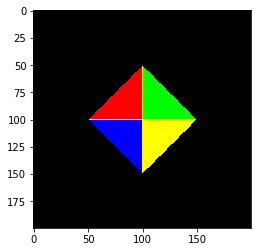

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def distancia(a1, b1, a2, b2):
    return np.abs(a1-a2)+np.abs(b1-b2)
    #return np.sqrt((a1-a2)**2+(b1-b2)**2)

qtdeLinhas = 200
qtdeColunas = 200


W = np.zeros((qtdeLinhas,qtdeColunas, 3), dtype=int)

centro = [100,100]
raio = 50

for i in range(qtdeLinhas):
    for j in range(qtdeColunas):
        if(distancia(i,j,centro[0],centro[1]) < raio):
            if( i < 100 and j < 100):
                W[i,j,0] = 255
            elif (i < 100 and j > 100):
                W[i,j,1] = 255
            elif (i > 100 and j < 100):
                W[i,j,2] = 255
            else:
                W[i,j,0] = 255
                W[i,j,1] = 255

    
plt.imshow(W)

## encontrando o contorno

Quantidade de objetos: 1


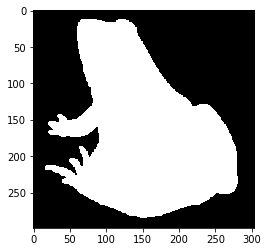

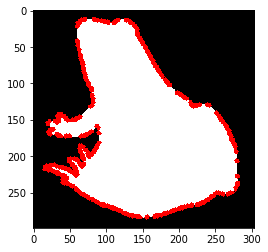

In [57]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread('frog.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #transformando a imagem em nível de cinza
_, imgBinaria = cv2.threshold(gray, 250, 255, cv2.THRESH_BINARY) #seleciona apenas os pixels dentro do intervalo [250,255]


(lx, contornos, tree) = cv2.findContours(imgBinaria, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#A variável lx (lixo) recebe dados que não são utilizados

print("Quantidade de objetos: "+ str(len(contornos)))


cv2.drawContours(img, contornos[0], -1, (255, 0, 0), 5)


plt.gray()
plt.imshow(imgBinaria)
plt.show()
plt.imshow(img)



## menor retangulo envolvente

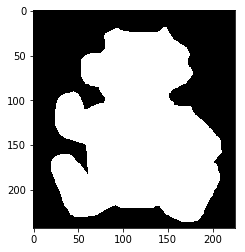

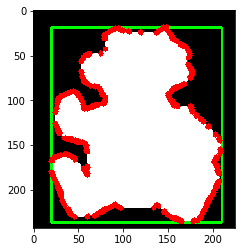

In [58]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread('urso.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #transformando a imagem em nível de cinza
_, imgBinaria = cv2.threshold(gray, 250, 255, cv2.THRESH_BINARY) #seleciona apenas os pixels dentro do intervalo [250,255]

(lx, contornos, tree) = cv2.findContours(imgBinaria, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#A variável lx (lixo) recebe dados que não são utilizados

x, y, w, h = cv2.boundingRect(contornos[0])
# Desenhando o retângulo na imagem imagemRGB
cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255, 0), 2)

cv2.drawContours(img, contornos[0], -1, (255, 0, 0), 5)


plt.gray()
plt.imshow(imgBinaria)
plt.show()
plt.imshow(img)

## menor circunferência envolvente

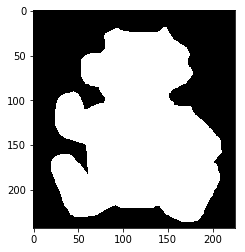

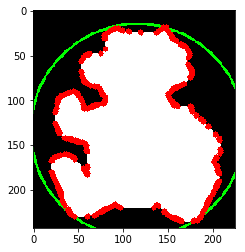

In [59]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread('urso.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #transformando a imagem em nível de cinza
_, imgBinaria = cv2.threshold(gray, 250, 255, cv2.THRESH_BINARY) #seleciona apenas os pixels dentro do intervalo [250,255]

(lx, contornos, tree) = cv2.findContours(imgBinaria, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#A variável lx (lixo) recebe dados que não são utilizados

# Obtendo o ponto central e o raio da circunferência
(x,y), raio = cv2.minEnclosingCircle(contornos[0])
centro = (int(x), int(y))
raio = int(raio)
# Desenhando a circunferência na imagem imagemRGB
cv2.circle(img, centro, raio, (0, 255, 0), 2)

cv2.drawContours(img, contornos[0], -1, (255, 0, 0), 5)


plt.gray()
plt.imshow(imgBinaria)
plt.show()
plt.imshow(img)

## menor elipse envolvente

((116.50872802734375, 144.39874267578125), (173.97344970703125, 232.2605743408203), 0.6873568296432495)


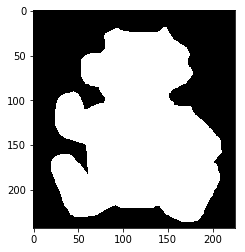

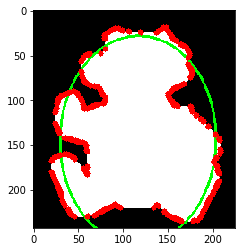

In [69]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread('urso.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #transformando a imagem em nível de cinza
_, imgBinaria = cv2.threshold(gray, 250, 255, cv2.THRESH_BINARY) #seleciona apenas os pixels dentro do intervalo [250,255]

(lx, contornos, tree) = cv2.findContours(imgBinaria, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Obtendo a elipse
ellipse = cv2.fitEllipse(contornos[0])
print(ellipse)
# Desenhando a elipse na imagem imagemRGB
cv2.ellipse(img, ellipse, (0, 255, 0), 2)

cv2.drawContours(img, contornos[0], -1, (255, 0, 0), 5)


plt.gray()
plt.imshow(imgBinaria)
plt.show()
plt.imshow(img)

## contando a quantidade de vertices

Quantidade de Vertices:  3


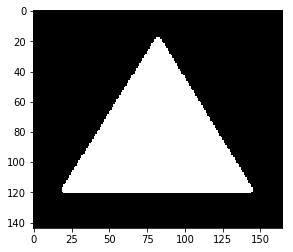

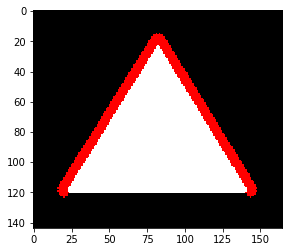

In [71]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread('triangulo.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #transformando a imagem em nível de cinza
_, imgBinaria = cv2.threshold(gray, 250, 255, cv2.THRESH_BINARY) #seleciona apenas os pixels dentro do intervalo [250,255]

(lx, contornos, tree) = cv2.findContours(imgBinaria, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


objeto = contornos[0]
perimetro = cv2.arcLength(objeto, True)
poligono = cv2.approxPolyDP(objeto, 0.03 * perimetro, True)
totalVertices = len(poligono)

print("Quantidade de Vertices: ", totalVertices)

cv2.drawContours(img, contornos[0], -1, (255, 0, 0), 5)


plt.gray()
plt.imshow(imgBinaria)
plt.show()
plt.imshow(img)

## momentos invariantes de HU

$m_i = [\frac{1}{n} \sum^{N}_{j = 1}(p(i,j)-c(i,j))^d]^{\frac{1}{d}}$

[[  3.1449772 ]
 [  7.6919591 ]
 [ 10.22817956]
 [ 12.49818734]
 [ 23.86158218]
 [ 16.36064361]
 [-25.36731482]]
Quantidade de objetos: 1


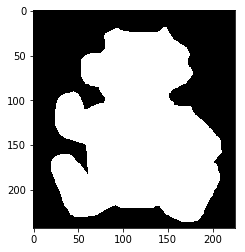

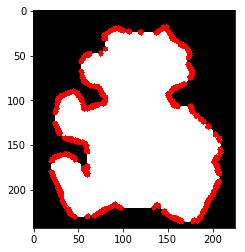

In [52]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread('urso.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #transformando a imagem em nível de cinza
_, imgBinaria = cv2.threshold(gray, 250, 255, cv2.THRESH_BINARY) #seleciona apenas os pixels dentro do intervalo [250,255]

momentos = cv2.moments(imgBinaria)
momentosDeHu = cv2.HuMoments(momentos)
#print(momentosDeHu)
print(-np.sign(momentosDeHu) * np.log10(np.abs(momentosDeHu)))



(lx, objetos, tree) = cv2.findContours(imgBinaria, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#A variável lx (lixo) recebe dados que não são utilizados

print("Quantidade de objetos: "+ str(len(objetos)))


cv2.drawContours(img, objetos[0], -1, (255, 0, 0), 5)


plt.gray()
plt.imshow(imgBinaria)
plt.show()
plt.imshow(img)


## rotulando os pontos do contorno em sentido horário

qtde de pontos do contorno:  159


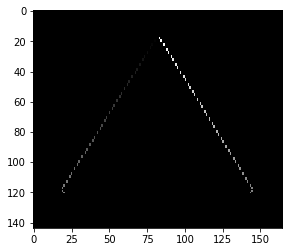

In [77]:
import cv2
import numpy as np
import matplotlib.pyplot as plt



img = cv2.imread('triangulo.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
_, imgBinaria = cv2.threshold(gray, 250, 255, cv2.THRESH_BINARY) #seleciona apenas os pixels dentro do intervalo [250,255]


(lx, contornos, tree) = cv2.findContours(imgBinaria, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


k = 1
pontos = []
for i in contornos[0]:
    pontos.append((i[0][1], i[0][0], k))
    k = k + 1

print("qtde de pontos do contorno: ", k)    
    
    
qtdeLinhas, qtdeColunas = gray.shape
W = np.zeros((qtdeLinhas, qtdeColunas))

for c in pontos:
    W[c[0],c[1]] = c[2]
    
    

plt.gray()
plt.imshow(W)

## encontrando o esqueleto da forma

1° passo: atribuir para cada pixel da imagem o rotulo do ponto do contorno mais próximo

qtde de pontos do contorno:  159


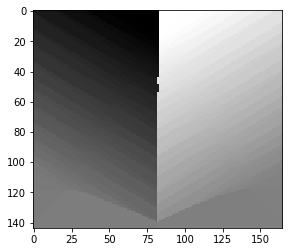

In [78]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def distancia(a, b):
    M = len(a)
    soma = 0
    for i in range(M):
        soma = soma + ((a[i]-b[i])**2)
    return np.sqrt(soma) 



img = cv2.imread('triangulo.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
_, imgBinaria = cv2.threshold(gray, 250, 255, cv2.THRESH_BINARY) #seleciona apenas os pixels dentro do intervalo [250,255]


(lx, contornos, tree) = cv2.findContours(imgBinaria, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


qtdeLinhas, qtdeColunas = gray.shape
W = np.zeros((qtdeLinhas, qtdeColunas))

k = 1
c = []
for i in contornos[0]:
    c.append((i[0][1], i[0][0], k))
    k = k + 1
    
print("qtde de pontos do contorno: ", k)    


for i in range(qtdeLinhas):
    for j in range(qtdeColunas):        
      
        menor_distancia = 99999999
        ind = 0
        
        for k in c:
            d = distancia([i,j], [k[0],k[1]])
            if(d < menor_distancia):
                menor_distancia = d
                ind = k[2]
        
        W[i,j] = ind
    
    
cv2.drawContours(img, contornos[0], -1, (255, 0, 0), 2)

plt.gray()
plt.imshow(W)